# Analysis of scenarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
scenario_list = pd.read_csv('scenario_list_test_1.csv', index_col='Scenario')
scenario_results = pd.read_csv('scenario_results_test_1.csv', low_memory=False, index_col=0)

# Merge on index
data = pd.merge(scenario_list, scenario_results, left_index=True, right_index=True)
data.to_csv('full_scenarios_and_results.csv', index_label=True)

data.head()

,process_time_call_ambulance,process_time_ambulance_response,process_ambulance_on_scene_duration,process_msu_dispatch,process_msu_thrombolysis,process_msu_on_scene_post_thrombolysis,process_time_arrival_to_needle,transfer_time_delay,process_time_arrival_to_puncture,process_time_transfer_arrival_to_puncture,...,lvo_msu_ivt_utility,lvo_msu_ivt_utility_shift,lvo_msu_mt_mrs_0-2,lvo_msu_mt_mrs_shift,lvo_msu_mt_utility,lvo_msu_mt_utility_shift,lvo_msu_ivt_mt_mrs_0-2,lvo_msu_ivt_mt_mrs_shift,lvo_msu_ivt_mt_utility,lvo_msu_ivt_mt_utility_shift
Scenario,,,,,,,,,,,,,,,,,,,,,
0,0,15,20,0,15,15,30,30,30,30,...,0.40774,0.07513,0.46382,-0.95936,0.51992,0.18731,0.46382,-0.95936,0.51992,0.18731
1,0,15,20,0,15,15,30,30,30,30,...,0.40774,0.07513,0.45403,-0.90970,0.51089,0.17828,0.45403,-0.90970,0.51089,0.17828
2,0,15,20,0,15,15,30,30,30,30,...,0.40774,0.07513,0.44428,-0.86042,0.50189,0.16928,0.44428,-0.86042,0.50189,0.16928
3,0,15,20,0,15,15,30,30,30,45,...,0.40774,0.07513,0.46382,-0.95936,0.51992,0.18731,0.46382,-0.95936,0.51992,0.18731
4,0,15,20,0,15,15,30,30,30,45,...,0.40774,0.07513,0.45403,-0.90970,0.51089,0.17828,0.45403,-0.90970,0.51089,0.17828


In [3]:
list(data)

['process_time_call_ambulance',
 'process_time_ambulance_response',
 'process_ambulance_on_scene_duration',
 'process_msu_dispatch',
 'process_msu_thrombolysis',
 'process_msu_on_scene_post_thrombolysis',
 'process_time_arrival_to_needle',
 'transfer_time_delay',
 'process_time_arrival_to_puncture',
 'process_time_transfer_arrival_to_puncture',
 'process_time_msu_arrival_to_puncture',
 'nearest_ivt_time',
 'nearest_mt_time',
 'transfer_time',
 'nearest_msu_time',
 'Admissions',
 'England',
 'drip_ship_ivt_time',
 'drip_ship_mt_time',
 'nlvo_no_treatment_mrs_0-2',
 'nlvo_no_treatment_utility',
 'lvo_no_treatment_mrs_0-2',
 'lvo_no_treatment_utility',
 'nlvo_drip_ship_ivt_mrs_0-2',
 'nlvo_drip_ship_ivt_mrs_shift',
 'nlvo_drip_ship_ivt_utility',
 'nlvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_ivt_mrs_0-2',
 'lvo_drip_ship_ivt_mrs_shift',
 'lvo_drip_ship_ivt_utility',
 'lvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_mt_mrs_0-2',
 'lvo_drip_ship_mt_mrs_shift',
 'lvo_drip_ship_mt_uti

## Create summary results

In [4]:
results = scenario_list.copy(deep=True)

results.head()
results['nlvo_msu_ivt_utility_benefit'] = data['nlvo_msu_ivt_utility'] - data['nlvo_drip_ship_ivt_utility']
results['lvo_msu_ivt_utility_benefit'] = data['lvo_msu_ivt_utility'] - data['lvo_drip_ship_ivt_utility']
results['lvo_msu_ivt_mt_utility_benefit'] = data['lvo_msu_ivt_mt_utility'] - data['lvo_drip_ship_ivt_mt_utility']
results['nlvo_msu_ivt_mrs_0-2_benefit'] = data['nlvo_msu_ivt_mrs_0-2'] - data['nlvo_drip_ship_ivt_mrs_0-2']
results['lvo_msu_ivt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mrs_0-2'] - data['lvo_drip_ship_ivt_mrs_0-2']
results['lvo_msu_ivt_mt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mt_mrs_0-2'] - data['lvo_drip_ship_ivt_mt_mrs_0-2']
results.to_csv('sceanrio_1_results_summary.csv', index_label='Scenario')


In [5]:
results.head()

,process_time_call_ambulance,process_time_ambulance_response,process_ambulance_on_scene_duration,process_msu_dispatch,process_msu_thrombolysis,process_msu_on_scene_post_thrombolysis,process_time_arrival_to_needle,transfer_time_delay,process_time_arrival_to_puncture,process_time_transfer_arrival_to_puncture,process_time_msu_arrival_to_puncture,nlvo_msu_ivt_utility_benefit,lvo_msu_ivt_utility_benefit,lvo_msu_ivt_mt_utility_benefit,nlvo_msu_ivt_mrs_0-2_benefit,lvo_msu_ivt_mrs_0-2_benefit,lvo_msu_ivt_mt_mrs_0-2_benefit
Scenario,,,,,,,,,,,,,,,,,
0,0,15,20,0,15,15,30,30,30,30,30,0.01361,0.00998,0.00759,0.01499,0.01049,0.00827
1,0,15,20,0,15,15,30,30,30,30,45,0.01361,0.00998,-0.00144,0.01499,0.01049,-0.00152
2,0,15,20,0,15,15,30,30,30,30,60,0.01361,0.00998,-0.01044,0.01499,0.01049,-0.01127
3,0,15,20,0,15,15,30,30,30,45,30,0.01361,0.00998,0.01660,0.01499,0.01049,0.01804
4,0,15,20,0,15,15,30,30,30,45,45,0.01361,0.00998,0.00757,0.01499,0.01049,0.00825


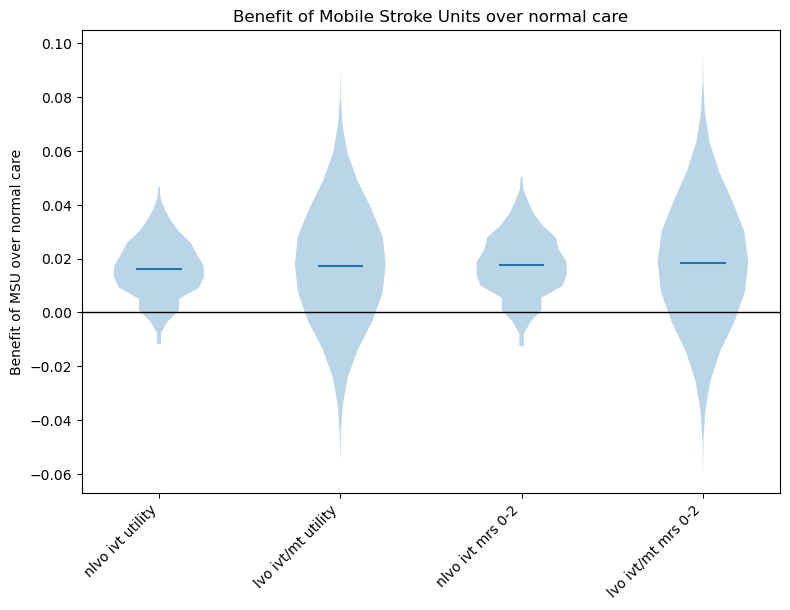

In [8]:
# Define results columns
results_cols = [
    'nlvo_msu_ivt_utility_benefit',
    'lvo_msu_ivt_mt_utility_benefit',
    'nlvo_msu_ivt_mrs_0-2_benefit',
    'lvo_msu_ivt_mt_mrs_0-2_benefit'
]

rename_dict = {
        
    'nlvo_msu_ivt_utility_benefit':'nlvo ivt utility',
    'lvo_msu_ivt_utility_benefit': 'lvo ivt utility',
    'lvo_msu_ivt_mt_utility_benefit': 'lvo ivt/mt utility',
    'nlvo_msu_ivt_mrs_0-2_benefit': 'nlvo ivt mrs 0-2',
    'lvo_msu_ivt_mrs_0-2_benefit': 'lvo ivt mrs 0-2',
    'lvo_msu_ivt_mt_mrs_0-2_benefit': 'lvo ivt/mt mrs 0-2',
}

# Plot violin plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.violinplot(results[results_cols], showextrema=False, showmeans=True, points=15)
# Add x-axis labels
ax.set_xticks(np.arange(1, len(results_cols)+1))
# Set labels using rename dict
ax.set_xticklabels([rename_dict[col] for col in results_cols])
plt.xticks(rotation=45, ha='right')
# Add a line at y=0
plt.axhline(0, color='black', lw=1)
# Add labels
plt.ylabel('Benefit of MSU over normal care')
plt.tight_layout()
plt.title('Benefit of Mobile Stroke Units over normal care')
plt.savefig('scenario_1_results_benefit.png', dpi=300, bbox_inches='tight')


plt.show()